In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV


import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'


In [14]:
df = pd.read_csv("../data/hdfc_data_indicators.csv")
df.head()

,Symbol,Open Price,High,Low,Close Price,Total Traded Quantity,Total Traded Value,Date,Average Trading Price,SMA,EWMA5,MiddleBand,UpperBand,LowerBand,RSI,MFI,ForceIndex,ATR,EMV
0,HDFC,2418.00,2438.50,2409.0,2433.95,945874,2.294534e+09,01-Jan-20,2425.834653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HDFC,2430.00,2472.75,2422.0,2466.40,1701396,4.169605e+09,02-Jan-20,2450.696553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.521030e+07,40.125,NaN
2,HDFC,2455.00,2466.40,2441.8,2454.45,1963923,4.815298e+09,03-Jan-20,2451.877371,NaN,NaN,NaN,NaN,NaN,57.586513,NaN,-2.346888e+07,37.675,39446.703197
3,HDFC,2428.00,2445.00,2371.4,2384.10,2656731,6.365761e+09,06-Jan-20,2396.087914,NaN,2424.910769,NaN,NaN,NaN,9.607698,NaN,-1.869010e+08,49.100,-59367.036521
4,HDFC,2401.25,2428.80,2380.2,2415.05,3771992,9.078865e+09,07-Jan-20,2406.915132,2430.79,2421.125355,2430.79,2496.101232,2365.478768,47.843171,NaN,1.167432e+08,61.100,-65962.508160


In [15]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df  = df.loc[:valid_split_idx].copy()
valid_df  = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = df.loc[test_split_idx+1:].copy()

In [16]:
# drop_cols = ['Symbol', 'Total Traded Quantity', 'Open Price', 'Low', 'High',"Average Trading Price",'52 Week Low','52 Week High','MiddleBand','LowerBand','UpperBand']
temp = df
drop_cols = ['Symbol', 'Total Traded Quantity', 'Open Price', 'Low', 'High',"Average Trading Price",'MiddleBand','LowerBand','UpperBand','Date']

train_df = train_df.drop(columns=drop_cols)
valid_df = valid_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)

In [17]:

cols = ["Close Price"]
y_train = train_df['Close Price'].copy()
X_train = train_df.drop(columns=cols)

y_valid = valid_df['Close Price'].copy()
X_valid = valid_df.drop(columns=cols)

y_test  = test_df['Close Price'].copy()
X_test  = test_df.drop(columns=cols)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total Traded Value  548 non-null    float64
 1   SMA                 544 non-null    float64
 2   EWMA5               545 non-null    float64
 3   RSI                 546 non-null    float64
 4   MFI                 535 non-null    float64
 5   ForceIndex          547 non-null    float64
 6   ATR                 547 non-null    float64
 7   EMV                 546 non-null    float64
dtypes: float64(8)
memory usage: 34.4 KB


In [18]:
# TODO: FIX THE WARNINGS

parameters = {
    'n_estimators': range(100,1000,100),#500
    'learning_rate': [0.001, 0.005, 0.01, 0.05] ,#0.05
    'max_depth': [8, 10, 12, 15,20,32,64,50], #8
    'gamma': [0.001, 0.005, 0.01, 0.02],#0.001
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=True)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')


[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:32] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:33] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:33] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[10:07:33] WARNING: ../src/lea

In [ ]:
parameters = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 8,
    'gamma':0.001,
    'random_state': 42
}

model = xgb.XGBRegressor(**parameters, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

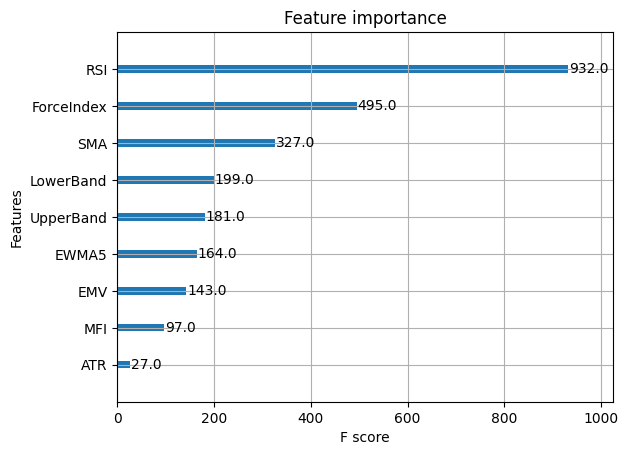

In [ ]:
plot_importance(model);

In [ ]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')


NotFittedError: need to call fit or load_model beforehand

In [ ]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 81992.3371923159


In [ ]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close Price'] = y_pred
predicted_prices.head()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=temp.Date, y=df['Close Price'],
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=predicted_prices['Close Price'],
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=y_pred,
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()